# Exploratory Analysis

In [29]:
import pandas as pd
import seaborn as sns

market_data = pd.read_csv('part_2.csv')

market_data.head()

,Unnamed: 0,Total Meal Fares,Total Delivery Fees,Total Restaurant Commissions,Total Orders,Marketplace Fee
0,Restaurant 1,4212.45,727.5,1474.62,291,0.350062
1,Restaurant 2,4034.32,1122.5,1107.87,449,0.274611
2,Restaurant 3,156.00,30.0,54.60,12,0.350000
3,Restaurant 4,1770.24,342.5,708.23,137,0.400076
4,Restaurant 5,1367.99,142.5,478.90,57,0.350076


In [30]:
market_data.describe()

,Total Meal Fares,Total Delivery Fees,Total Restaurant Commissions,Total Orders,Marketplace Fee
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,10913.658449,1514.878405,3003.254027,605.959144,0.293333
std,17243.208457,2344.833793,4624.682724,937.939302,0.045824
min,0.010000,2.500000,0.000000,1.000000,0.000000
25%,1496.975000,226.875000,454.192500,90.750000,0.250193
50%,4591.875000,693.750000,1325.635000,277.500000,0.300000
75%,12548.787500,1739.375000,3441.487500,695.750000,0.346950
max,140479.910000,18620.000000,41331.640000,7448.000000,0.422328


We can see that we have 1028 restaurants in our dataset and it is complete, though at least one restaurant has had a no commission order.

Let's have a look at the distributions with a plot.

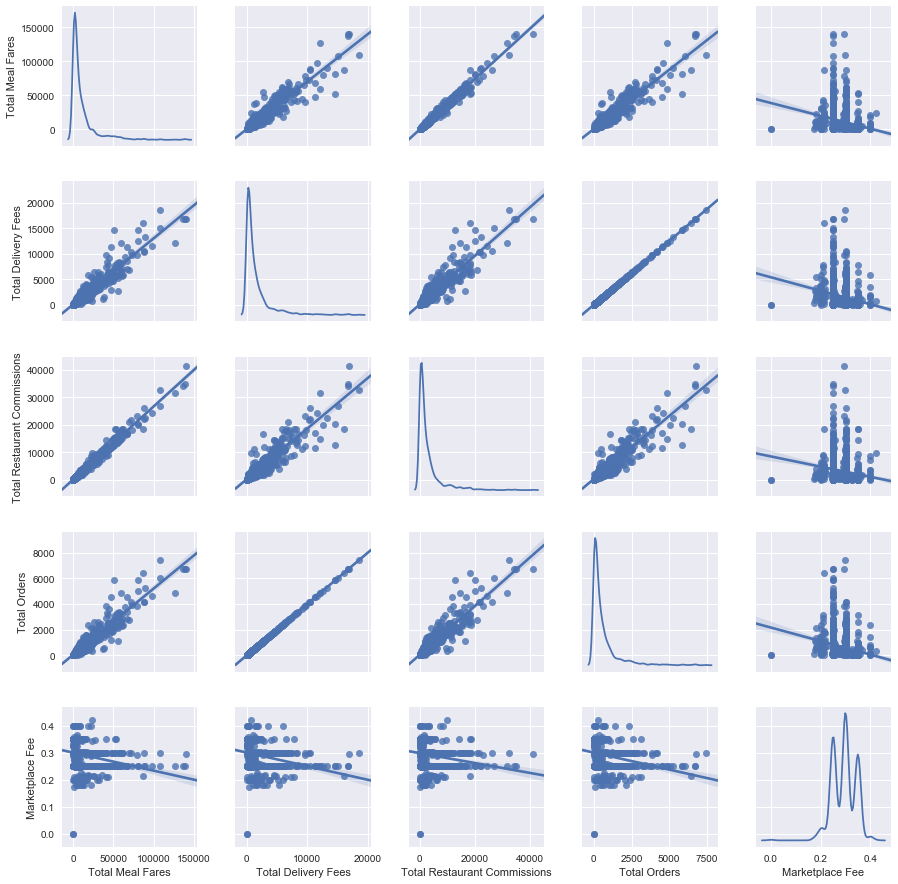

In [31]:
sns.pairplot(market_data, diag_kind='kde', kind='reg')

sns.plt.show()

There are a few interesting things here: 
1. Looking at the kde plot of the Marketplace Fee we can see that there are three main marketplace fees that are charged, 25, 30 and 35% with the majority of restaurants sitting in this band.
2. Total Orders vs. Delivery Fees shows a direct linear relationship which means we have the same fixed delivery fee per order with each restaurant (not related to distance travelled etc.).

## Marketplace Fee
From the data we see the mean/median marketplace fee is 29%/30%, though we should calculate a weighted one that takes into account orders at each restaurant to get a better understanding.

In [32]:
print("Blended Marketplace Fee: {:.0%}".format(sum(market_data['Total Restaurant Commissions']) / 
                                               sum(market_data['Total Meal Fares'])))

Blended Marketplace Fee: 28%


So we see that the actual blended marketplace fee is 28% which suggests that the restaurants that have a high marketplace fee aren't actually doing many orders. This matches what we see in the scatter plots above.

Comparing to the peer markets, Riyadh is on the lower end and ideally would be increased by 1-2% to match. It should be noted that the largest competitor actually has a very low marketplace fee at 22% so we would need to be careful to make sure we are pitching our added-value to restaurants to make up for the higher fees.

In [33]:
total_orders = sum(market_data['Total Orders'])

market_data['marketfee_rank'] = market_data['Marketplace Fee'].rank(ascending=True)

market_data.head()

,Unnamed: 0,Total Meal Fares,Total Delivery Fees,Total Restaurant Commissions,Total Orders,Marketplace Fee,marketfee_rank
0,Restaurant 1,4212.45,727.5,1474.62,291,0.350062,877.0
1,Restaurant 2,4034.32,1122.5,1107.87,449,0.274611,364.0
2,Restaurant 3,156.00,30.0,54.60,12,0.350000,821.0
3,Restaurant 4,1770.24,342.5,708.23,137,0.400076,1026.0
4,Restaurant 5,1367.99,142.5,478.90,57,0.350076,892.0


What happens if we're removing ones that have a really high AOV? This would be bad because the low commission is balanced by the large order value.